In [2]:
import pandas as pd
import numpy as np

In [7]:
df_last = pd.read_csv('./data/주택도시보증공사_전국 평균 분양가격(2019년 9월).csv', encoding='cp949')
df_last.shape

(4080, 5)

In [8]:
## euc-kr 와 cp949 의 차이

In [9]:
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [10]:
df_last.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
4075,제주,전체,2019,9,3869
4076,제주,전용면적 60㎡이하,2019,9,3804
4077,제주,전용면적 60㎡초과 85㎡이하,2019,9,3884
4078,제주,전용면적 85㎡초과 102㎡이하,2019,9,NaN
4079,제주,전용면적 102㎡초과,2019,9,3601


In [12]:
df_first = pd.read_csv('./data/전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv', encoding='cp949')
df_first.shape

(17, 22)

In [13]:
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [14]:
df_first.tail()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
12,전북,6282,6281,5946,5966,6277,6306,6351,6319,6436,...,6583,6583,6583,6583,6542,6551,6556,6601,6750,6580
13,전남,5678,5678,5678,5696,5736,5656,5609,5780,5685,...,5768,5784,5784,5833,5825,5940,6050,6243,6286,6289
14,경북,6168,6168,6234,6317,6412,6409,6554,6556,6563,...,6881,6989,6992,6953,6997,7006,6966,6887,7035,7037
15,경남,6473,6485,6502,6610,6599,6610,6615,6613,6606,...,7125,7332,7592,7588,7668,7683,7717,7715,7723,7665
16,제주,7674,7900,7900,7900,7900,7900,7914,7914,7914,...,7724,7739,7739,7739,7826,7285,7285,7343,7343,7343


In [15]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 5 columns):
지역명        4080 non-null object
규모구분       4080 non-null object
연도         4080 non-null int64
월          4080 non-null int64
분양가격(㎡)    3827 non-null object
dtypes: int64(2), object(3)
memory usage: 159.5+ KB


In [18]:
df_last.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    253
dtype: int64

In [20]:
df_last.isna().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    253
dtype: int64

In [21]:
df_last['분양가격(㎡)'].astype('int')

ValueError: invalid literal for int() with base 10: '  '

In [23]:
df_last['분양가격'] = pd.to_numeric(df_last['분양가격(㎡)'], errors='coerce') ## 강제로 바꿔주기
df_last[['분양가격', '분양가격(㎡)']].head()

,분양가격,분양가격(㎡)
0,5841.0,5841
1,5652.0,5652
2,5882.0,5882
3,5721.0,5721
4,5879.0,5879


In [24]:
df_last['평당분양가격'] = df_last['분양가격'] * 3.3
df_last[['분양가격', '평당분양가격']].head()

,분양가격,평당분양가격
0,5841.0,19275.3
1,5652.0,18651.6
2,5882.0,19410.6
3,5721.0,18879.3
4,5879.0,19400.7


In [25]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 7 columns):
지역명        4080 non-null object
규모구분       4080 non-null object
연도         4080 non-null int64
월          4080 non-null int64
분양가격(㎡)    3827 non-null object
분양가격       3726 non-null float64
평당분양가격     3726 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 223.2+ KB


In [26]:
df_last['분양가격(㎡)'].describe()

count     3827
unique    1676
top       2221
freq        17
Name: 분양가격(㎡), dtype: object

In [27]:
df_last['분양가격'].describe()

count     3726.000000
mean      3201.605743
std       1223.855504
min       1868.000000
25%       2418.500000
50%       2855.000000
75%       3508.000000
max      12728.000000
Name: 분양가격, dtype: float64

In [29]:
df_last['전용면적'] = df_last['규모구분'].str.replace('전용면적', '')
df_last['전용면적'] = df_last['전용면적'].str.replace('초과', '~')
df_last['전용면적'] = df_last['전용면적'].str.replace('이하','')
df_last['전용면적'].head()

0            전체
1           60㎡
2      60㎡~ 85㎡
3     85㎡~ 102㎡
4         102㎡~
Name: 전용면적, dtype: object

In [30]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

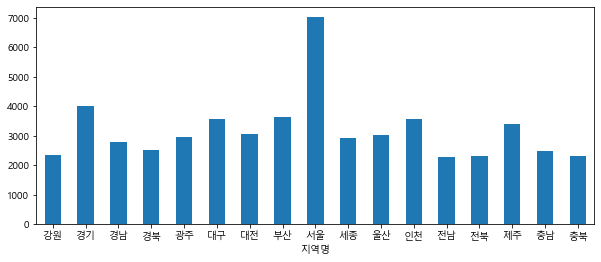

In [35]:
df_last.groupby(['지역명'])['분양가격'].mean().plot.bar(rot=0, figsize=(10,4))

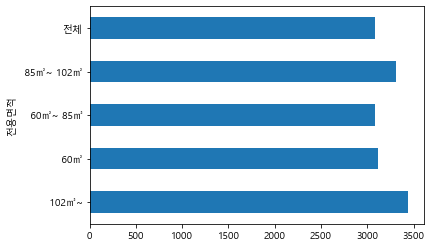

In [36]:
df_last.groupby(['전용면적'])['분양가격'].mean().plot.barh()

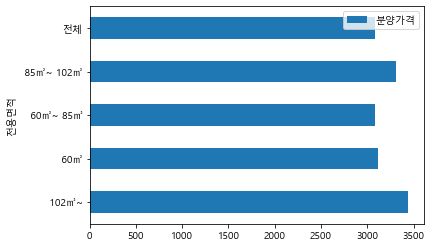

In [37]:
df_last.pivot_table(index='전용면적', values='분양가격').plot.barh()

In [40]:
%timeit df_last.groupby(['전용면적'])['분양가격'].mean()

1.19 ms ± 33.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [41]:
%timeit df_last.pivot_table(index='전용면적', values='분양가격')

7 ms ± 288 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [42]:
df_last.groupby(['전용면적'])['분양가격'].describe()

,count,mean,std,min,25%,50%,75%,max
전용면적,,,,,,,,
102㎡~,734.0,3445.238420,1242.394627,2138.0,2606.00,2967.0,4085.00,8972.0
60㎡,746.0,3117.587131,1222.489553,1900.0,2348.00,2668.5,3455.75,8281.0
60㎡~ 85㎡,790.0,3080.829114,1130.389306,1906.0,2347.25,2782.5,3395.00,8588.0
85㎡~ 102㎡,666.0,3311.575075,1380.484211,1868.0,2627.00,2880.0,3395.00,12728.0
전체,790.0,3082.650633,1114.205965,1909.0,2356.00,2783.0,3390.25,8100.0


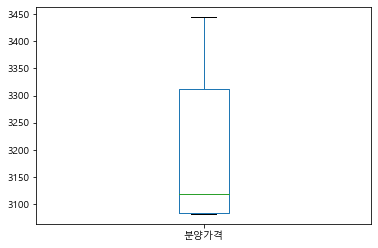

In [45]:
df_last.groupby(['전용면적'])['분양가격'].mean().plot.box()

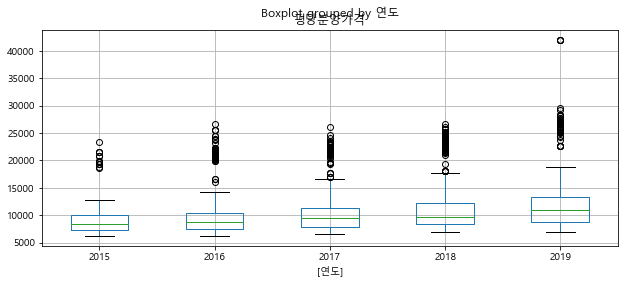

In [49]:
df_last[['연도', '평당분양가격']].boxplot(by='연도', figsize=(10,4))

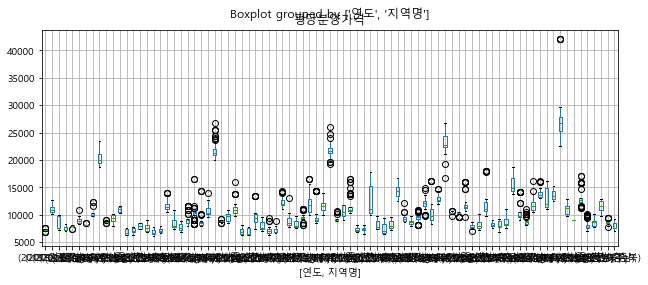

In [51]:
df_last[['연도','지역명', '평당분양가격']].boxplot(by=['연도','지역명'], figsize=(10,4))

In [56]:
df_seoul = df_last[df_last['지역명'] =='서울']

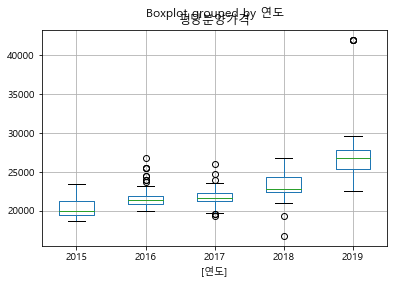

In [57]:
df_seoul[['연도','평당분양가격']].boxplot(by='연도')

In [58]:
import seaborn as sns
%matplotlib inline

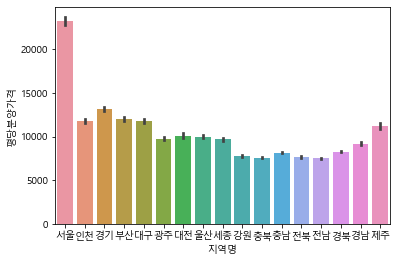

In [61]:
sns.barplot(data=df_last, x='지역명', y='평당분양가격')

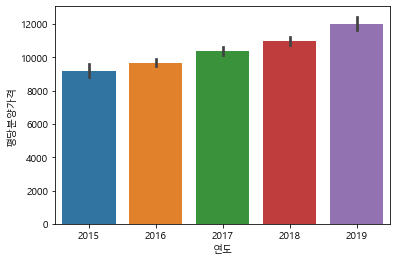

In [62]:
sns.barplot(data=df_last, x='연도', y='평당분양가격')
# 검은색선 신뢰구간 의미 => 길수록 편차가 크다

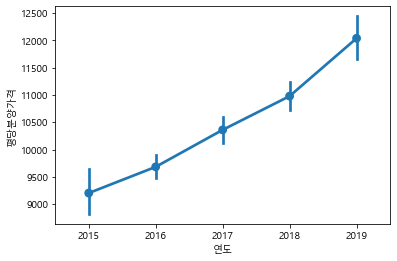

In [63]:
sns.pointplot(data=df_last, x='연도', y='평당분양가격')

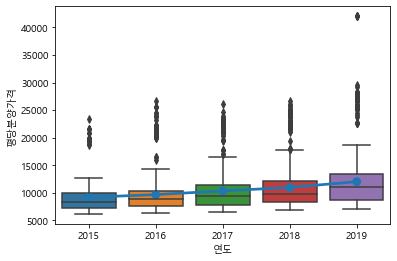

In [65]:
sns.boxplot(data=df_last, x='연도', y='평당분양가격')
sns.pointplot(data=df_last, x='연도', y='평당분양가격')

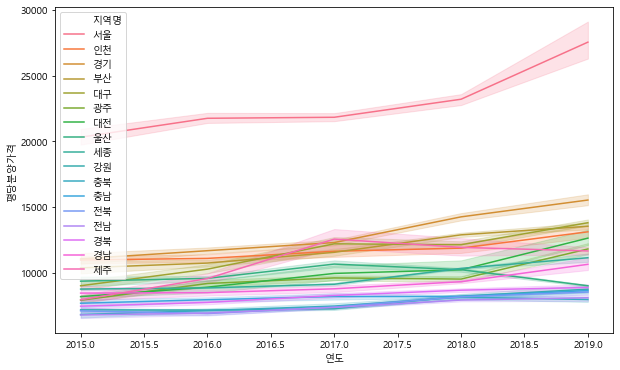

In [70]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df_last, x='연도', y='평당분양가격', hue='지역명')


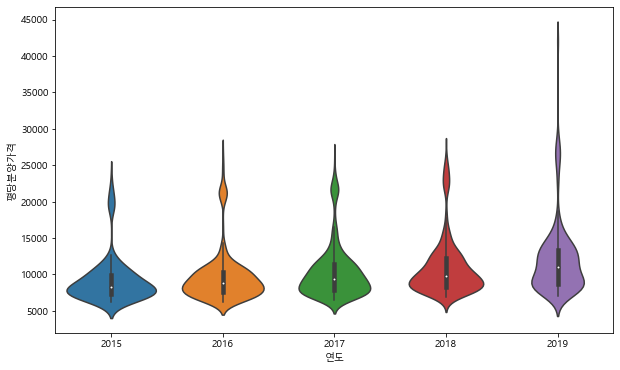

In [72]:
plt.figure(figsize=(10,6))

sns.violinplot(data=df_last, x='연도', y='평당분양가격')


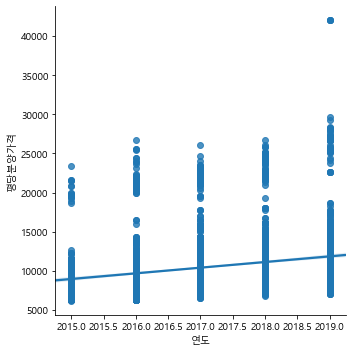

In [73]:
sns.lmplot(data=df_last, x='연도', y='평당분양가격')


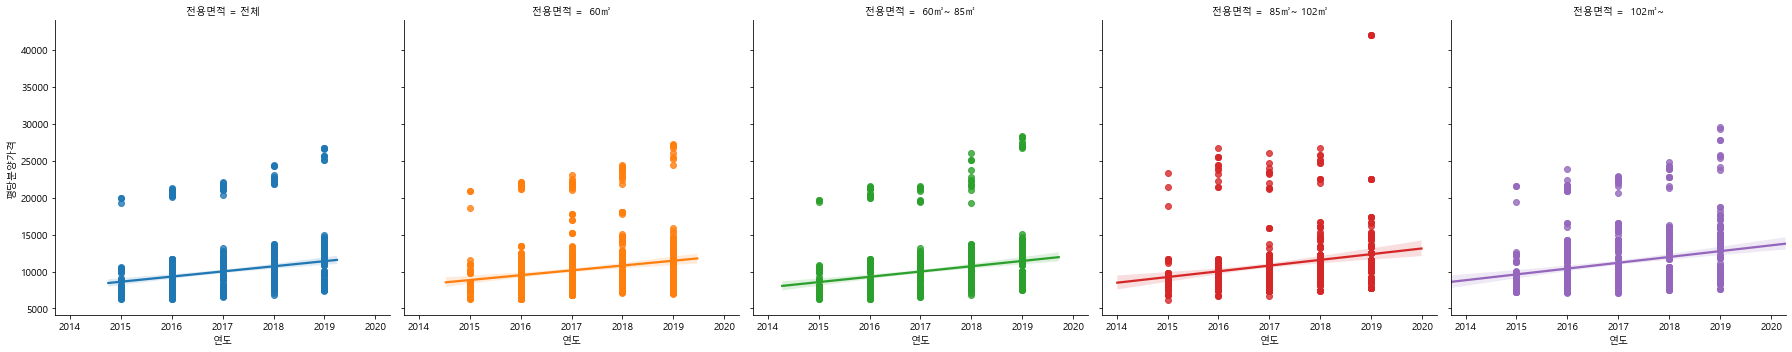

In [75]:
sns.lmplot(data=df_last, x='연도', y='평당분양가격', hue='전용면적', col='전용면적')


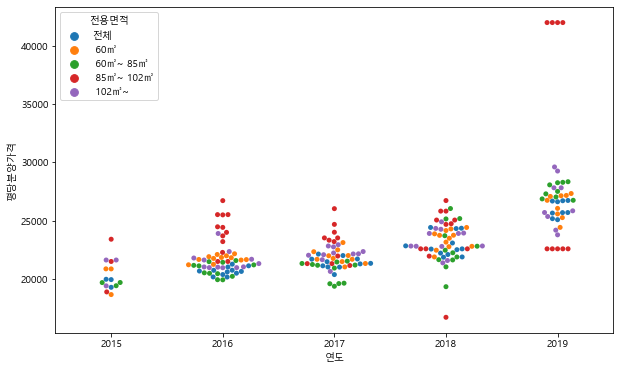

In [79]:
plt.figure(figsize=(10,6))

sns.swarmplot(data=df_seoul, x='연도', y='평당분양가격', hue='전용면적')


In [82]:
max_price = df_last['평당분양가격'].max()
max_price

42002.399999999994

In [83]:
df_last[df_last['평당분양가격'] == max_price]

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격,전용면적
3743,서울,전용면적 85㎡초과 102㎡이하,2019,6,12728,12728.0,42002.4,85㎡~ 102㎡
3828,서울,전용면적 85㎡초과 102㎡이하,2019,7,12728,12728.0,42002.4,85㎡~ 102㎡
3913,서울,전용면적 85㎡초과 102㎡이하,2019,8,12728,12728.0,42002.4,85㎡~ 102㎡
3998,서울,전용면적 85㎡초과 102㎡이하,2019,9,12728,12728.0,42002.4,85㎡~ 102㎡


In [84]:
%timeit df_last[df_last['평당분양가격'].notnull()]['평당분양가격'].head()

1.33 ms ± 39.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [85]:
%timeit df_last.loc[df_last['평당분양가격'].notnull(), '평당분양가격'].head()

690 µs ± 17.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


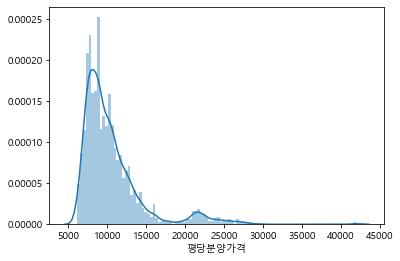

In [89]:
sns.distplot(df_last.loc[df_last['평당분양가격'].notnull(), '평당분양가격'], bins=100)

In [96]:
df_seoul_2019 = df_seoul.loc[
    df_seoul['평당분양가격'].notnull() & (df_seoul['연도'] == 2019), 
    '평당분양가격']

df_seoul_2018 = df_seoul.loc[
    df_seoul['평당분양가격'].notnull() & (df_seoul['연도'] == 2018), 
    '평당분양가격']

df_seoul_2017 = df_seoul.loc[
    df_seoul['평당분양가격'].notnull() & (df_seoul['연도'] == 2017), 
    '평당분양가격']

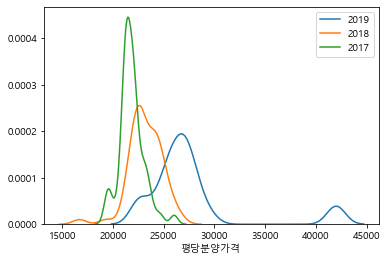

In [97]:
sns.distplot(df_seoul_2019, hist=False, label=2019)
sns.distplot(df_seoul_2018, hist=False, label=2018)
sns.distplot(df_seoul_2017, hist=False, label=2017)

In [98]:
df_last['전용면적'].value_counts()

 85㎡~ 102㎡    816
전체            816
 60㎡          816
 102㎡~        816
 60㎡~ 85㎡     816
Name: 전용면적, dtype: int64

In [99]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
지역          17 non-null object
2013년12월    17 non-null int64
2014년1월     17 non-null int64
2014년2월     17 non-null int64
2014년3월     17 non-null int64
2014년4월     17 non-null int64
2014년5월     17 non-null int64
2014년6월     17 non-null int64
2014년7월     17 non-null int64
2014년8월     17 non-null int64
2014년9월     17 non-null int64
2014년10월    17 non-null int64
2014년11월    17 non-null int64
2014년12월    17 non-null int64
2015년1월     17 non-null int64
2015년2월     17 non-null int64
2015년3월     17 non-null int64
2015년4월     17 non-null int64
2015년5월     17 non-null int64
2015년6월     17 non-null int64
2015년7월     17 non-null int64
2015년8월     17 non-null int64
dtypes: int64(21), object(1)
memory usage: 3.0+ KB


In [100]:
df_first.isnull().sum()

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

In [105]:
df_first_columns = df_first.columns[1:].to_list()
df_first_columns

['2013년12월',
 '2014년1월',
 '2014년2월',
 '2014년3월',
 '2014년4월',
 '2014년5월',
 '2014년6월',
 '2014년7월',
 '2014년8월',
 '2014년9월',
 '2014년10월',
 '2014년11월',
 '2014년12월',
 '2015년1월',
 '2015년2월',
 '2015년3월',
 '2015년4월',
 '2015년5월',
 '2015년6월',
 '2015년7월',
 '2015년8월']

In [102]:
pd.melt?

In [107]:
df_first_melt = pd.melt(df_first, id_vars='지역', value_vars=df_first_columns)
df_first_melt.head()

,지역,variable,value
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


In [109]:
df_first_melt.columns = ['지역명', '기간', '평당분양가격']
df_first_melt.head()

,지역명,기간,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


In [110]:
date = '2013년12월'
date

'2013년12월'

In [114]:
year = date.split('년')[0]
type(year)

str

In [115]:
year == 2013

False

In [113]:
date.split('년')[1].replace('월','')

'12'

In [128]:
def parse_year(date):
    year = date.split('년')[0]
    int(year)    
    return year

def parse_month(date):    
    month = date.split('년')[1].replace('월','')
    int(month)
    return  month

In [129]:
parse_year(date)

'2013'

In [130]:
df_first_melt['연도'] = df_first_melt['기간'].apply(parse_year)
df_first_melt['연도'].head()

0    2013
1    2013
2    2013
3    2013
4    2013
Name: 연도, dtype: object

In [131]:
df_first_melt['월'] = df_first_melt['기간'].apply(parse_month)
df_first_melt['월'].head()

0    12
1    12
2    12
3    12
4    12
Name: 월, dtype: object

In [132]:
df_first_melt.sample()

,지역명,기간,평당분양가격,연도,월
237,제주,2015년1월,7739,2015,1


In [133]:
columns = ['지역명','연도','월','평당분양가격']

In [135]:
df_last_prepare = df_last.loc[
    df_last['전용면적'] == '전체', columns].copy()
df_last_prepare.sample()

,지역명,연도,월,평당분양가격
280,광주,2016,1,8477.7


In [137]:
df_first_prepare = df_first_melt[columns].copy()
df_first_prepare.sample()

,지역명,연도,월,평당분양가격
99,경북,2014,5,6409


In [152]:
df = pd.concat([df_first_prepare, df_last_prepare])
df.head()

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189.0
1,부산,2013,12,8111.0
2,대구,2013,12,8080.0
3,인천,2013,12,10204.0
4,광주,2013,12,6098.0


In [153]:
df.tail()

,지역명,연도,월,평당분양가격
4055,전북,2019,9,8679.0
4060,전남,2019,9,8187.3
4065,경북,2019,9,8771.4
4070,경남,2019,9,9883.5
4075,제주,2019,9,12767.7


In [154]:
df['연도'].value_counts()

2018    204
2017    204
2016    204
2014    204
2019    153
2015    136
2015     51
2013     17
Name: 연도, dtype: int64

In [155]:
df_year_city = pd.pivot_table(df,index='연도', columns='지역명', values='평당분양가격')
df_year_city = round(df_year_city)
df_year_city

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2015,7160.0,10377.0,7586.0,7171.0,8052.0,9232.0,8098.0,10307.0,19725.0,8750.0,10053.0,10484.0,6317.0,6703.0,7405.0,7115.0,6645.0
2016,7011.0,11220.0,7848.0,7361.0,8899.0,10310.0,8502.0,10430.0,20663.0,8860.0,10209.0,10532.0,6489.0,6418.0,9129.0,7331.0,6770.0
2017,7127.0,11850.0,8120.0,7795.0,9464.0,11456.0,9045.0,11578.0,21376.0,9135.0,11345.0,10737.0,7188.0,7058.0,10831.0,7456.0,6763.0
2018,7681.0,13186.0,9019.0,8505.0,9856.0,12076.0,10180.0,12998.0,22889.0,10355.0,10241.0,11274.0,7789.0,7626.0,11891.0,8013.0,7874.0
2019,8113.0,14391.0,9688.0,8603.0,11569.0,13644.0,11708.0,13122.0,26002.0,10968.0,8992.0,12494.0,7802.0,8182.0,11918.0,8600.0,7577.0
2013,6230.0,10855.0,6473.0,6168.0,6098.0,8080.0,8321.0,8111.0,18189.0,7601.0,8090.0,10204.0,5678.0,6282.0,7674.0,6365.0,6589.0
2014,6332.0,10509.0,6729.0,6536.0,7588.0,8286.0,8240.0,9180.0,18997.0,8085.0,8362.0,10075.0,5719.0,6362.0,7855.0,6682.0,6620.0
2015,6708.0,10531.0,7669.0,6984.0,7920.0,8510.0,8107.0,9381.0,19117.0,8600.0,8981.0,10199.0,6031.0,6593.0,7488.0,6991.0,6720.0


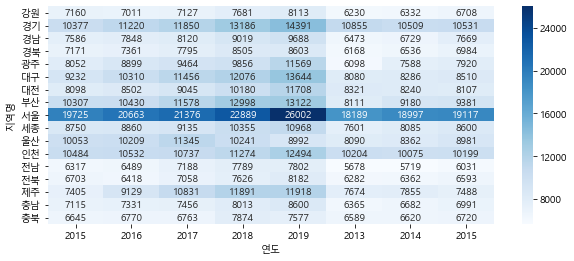

In [156]:
plt.figure(figsize=(10,4))
sns.heatmap(df_year_city.T, annot=True, fmt='.0f', cmap='Blues')